In [1]:
# Execute this cell to reset the plots and reload graphing code
%run analysis_script.py

CE -> Setting up -> Training with preprocessing and random  mask

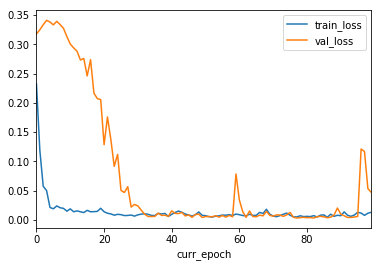

In [10]:
experiment_name = "CE_random_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

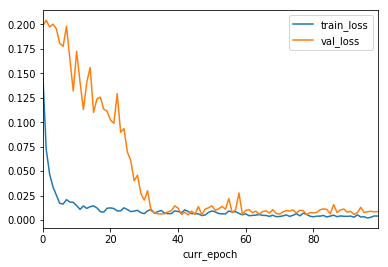

In [11]:
experiment_name = "CE_central_patch_2_preprocessed"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

CE -> Setting up -> DTD

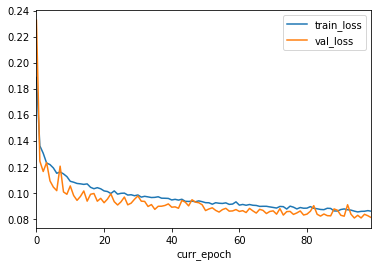

In [2]:
experiment_name = "CE_DTD_random_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)

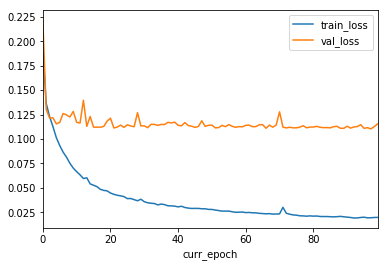

In [3]:
experiment_name = "CE_DTD_central_patch_test_1"

show_traces(experiment_name = experiment_name, variables_to_show = ["train_loss", "val_loss"], logy=False, n = 1)